# Setup

In [19]:
# import your standard packages
%run ../../global_tools/start.py

# import your local functions
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Paths and Parameters

In [20]:
bounds_AS = [68,79,3,20]
bounds_wBoB = [79,87,2,21]
bounds_BoB = [87,100,0,23]

# Read Data

In [21]:
# SLA
ds_SLA = xr.open_dataset('../data/sla_to_woa.nc')
ds_SLA


<xarray.Dataset>
Dimensions:           (lat: 35, lon: 55, month: 12)
Coordinates:
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lon               (lon) float32 48.5 49.5 50.5 51.5 ... 100.5 101.5 102.5
  * lat               (lat) float32 -1.5 -0.5 0.5 1.5 ... 29.5 30.5 31.5 32.5
Data variables:
    mon_sla_mon_clim  (month, lat, lon) float64 ...

In [22]:
# WOA
ds_WOA = xr.open_dataset('../data/woa_processed.nc')
ds_WOA

<xarray.Dataset>
Dimensions:                      (coastal_loc: 1925, coastal_pos: 439, depth: 57, lat: 35, lon: 55, lonmin,lonmax,latmin,latmax: 4, month: 12)
Coordinates:
  * month                        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * depth                        (depth) float32 0.0 5.0 10.0 ... 1450.0 1500.0
  * lon                          (lon) float32 48.5 49.5 50.5 ... 101.5 102.5
  * lat                          (lat) float32 -1.5 -0.5 0.5 ... 30.5 31.5 32.5
  * coastal_loc                  (coastal_loc) int64 0 1 2 3 ... 1922 1923 1924
  * coastal_pos                  (coastal_pos) int64 0 1 2 3 ... 435 436 437 438
  * lonmin,lonmax,latmin,latmax  (lonmin,lonmax,latmin,latmax) int64 0 1 2 3
Data variables:
    temp                         (month, depth, lat, lon) float64 ...
    psal                         (month, depth, lat, lon) float64 ...
    doxy                         (month, depth, lat, lon) float64 ...
    nitrate                      (month, depth, lat

# Whole Indian Ocean Scatterplots

Text(0, 0.5, 'temp')

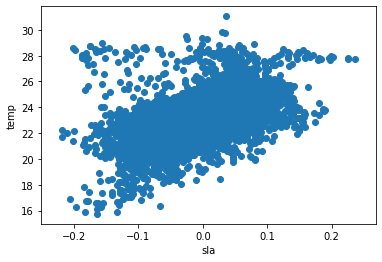

In [23]:
sla = ds_SLA.mon_sla_mon_clim.stack(allpoints=['month','lat','lon'])
temp = ds_WOA.temp_50_200.stack(allpoints=['month','lat','lon'])
doxy = ds_WOA.doxy_50_200.stack(allpoints=['month','lat','lon'])
nitrate = ds_WOA.nitrate_50_200.stack(allpoints=['month','lat','lon'])

plt.scatter(sla,temp)
plt.xlabel('sla')
plt.ylabel('temp')
# plt.ylim([0,150])

Text(0, 0.5, 'doxy')

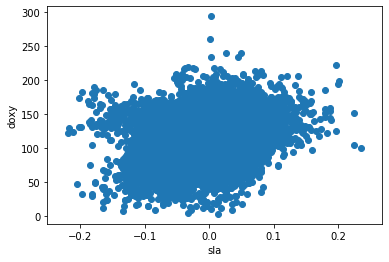

In [24]:
plt.scatter(sla,doxy)
plt.xlabel('sla')
plt.ylabel('doxy')

Text(0, 0.5, 'nitrate')

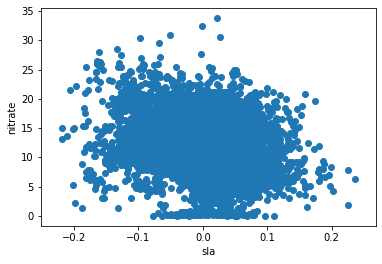

In [25]:
plt.scatter(sla,nitrate)
plt.xlabel('sla')
plt.ylabel('nitrate')

# Subset for AS and BoB

In [26]:
#----------------- Arabian Sea ---------------------#

lat_slice_AS = slice(bounds_AS[2],bounds_AS[3]) 
lon_slice_AS = slice(bounds_AS[0],bounds_AS[1]) 

#subset gridded data
temp_AS = ds_WOA.temp_50_200.sel(lat = lat_slice_AS, lon = lon_slice_AS)
doxy_AS = ds_WOA.doxy_50_200.sel(lat = lat_slice_AS, lon = lon_slice_AS)
nitrate_AS = ds_WOA.nitrate_50_200.sel(lat = lat_slice_AS, lon = lon_slice_AS)
sla_AS = ds_SLA.mon_sla_mon_clim.sel(lat = lat_slice_AS, lon = lon_slice_AS)
    
# convert to coastal
xx,yy = np.meshgrid(np.array(temp_AS.lon),np.array(temp_AS.lat))
xx_AS = xx.flatten()
yy_AS = yy.flatten()

mask_AS = mask_coast(xx_AS,yy_AS,np.array(ds_WOA.coastal_mask_bounds))
temp_AS = temp_AS.stack(allpoints=['lat','lon'])[:,mask_AS]
doxy_AS = doxy_AS.stack(allpoints=['lat','lon'])[:,mask_AS]
nitrate_AS = nitrate_AS.stack(allpoints=['lat','lon'])[:,mask_AS]
sla_AS = sla_AS.stack(allpoints=['lat','lon'])[:,mask_AS]

mon_AS = np.full(temp_AS.shape,np.nan)
for tt in range(1,13):
    mon_AS[tt-1,:] = np.ones([1,temp_AS.shape[1]])*tt
    
temp_AS = np.array(temp_AS).flatten()
doxy_AS = np.array(doxy_AS).flatten()
nitrate_AS = np.array(nitrate_AS).flatten()
sla_AS = np.array(sla_AS).flatten()
mon_AS = mon_AS.flatten()

sla_AS = sla_AS[~np.isnan(temp_AS)]
doxy_AS = doxy_AS[~np.isnan(temp_AS)]
nitrate_AS = nitrate_AS[~np.isnan(temp_AS)]
mon_AS = mon_AS[~np.isnan(temp_AS)]
temp_AS = temp_AS[~np.isnan(temp_AS)]

#---------------- Western Bay of Bengal --------------------#

lat_slice_wBoB = slice(bounds_wBoB[2],bounds_wBoB[3])
lon_slice_wBoB = slice(bounds_wBoB[0],bounds_wBoB[1])

#subset gridded data
temp_wBoB = ds_WOA.temp_50_200.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
doxy_wBoB = ds_WOA.doxy_50_200.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
nitrate_wBoB = ds_WOA.nitrate_50_200.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
sla_wBoB = ds_SLA.mon_sla_mon_clim.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)

# # # remove andaman and nicobar 
# ind = (ds_WOA.lon >91) & (ds_WOA.lon <94.5)& (ds_WOA.lat >6) & (ds_WOA.lat <14)
# temp_BoB = temp_BoB.where(~ind)
# doxy_BoB = doxy_BoB.where(~ind)
# sla_BoB = sla_BoB .where(~ind)

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_wBoB.lon),np.array(temp_wBoB.lat))
xx_wBoB = xx.flatten()
yy_wBoB = yy.flatten()

mask_wBoB = mask_coast(xx_wBoB,yy_wBoB,np.array(ds_WOA.coastal_mask_bounds))
temp_wBoB = temp_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
doxy_wBoB = doxy_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
nitrate_wBoB = nitrate_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
sla_wBoB = sla_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
xx_wBoB = xx_wBoB[mask_wBoB]
yy_wBoB = yy_wBoB[mask_wBoB]

mon_wBoB = np.full(temp_wBoB.shape,np.nan)
for tt in range(1,13):
    mon_wBoB[tt-1,:] = np.ones([1,temp_wBoB.shape[1]])*tt

# fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize=(4,6),dpi=200)
    
# plt.scatter(xx_BoB,yy_BoB, c = tcp_BoB[0,:])
    
temp_wBoB = np.array(temp_wBoB).flatten()
doxy_wBoB = np.array(doxy_wBoB).flatten()
nitrate_wBoB = np.array(nitrate_wBoB).flatten()
sla_wBoB = np.array(sla_wBoB).flatten()
mon_wBoB = mon_wBoB.flatten()

sla_wBoB = sla_wBoB[~np.isnan(temp_wBoB)]
doxy_wBoB = doxy_wBoB[~np.isnan(temp_wBoB)]
nitrate_wBoB = nitrate_wBoB[~np.isnan(temp_wBoB)]
mon_wBoB = mon_wBoB[~np.isnan(temp_wBoB)]
temp_wBoB = temp_wBoB[~np.isnan(temp_wBoB)]


#---------------- Bay of Bengal --------------------#

lat_slice_BoB = slice(bounds_BoB[2],bounds_BoB[3])
lon_slice_BoB = slice(bounds_BoB[0],bounds_BoB[1])

#subset gridded data
temp_BoB = ds_WOA.temp_50_200.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)
doxy_BoB = ds_WOA.doxy_50_200.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)
nitrate_BoB = ds_WOA.nitrate_50_200.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)
sla_BoB = ds_SLA.mon_sla_mon_clim.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)

# # # remove andaman and nicobar 
# ind = (ds_WOA.lon >91) & (ds_WOA.lon <94.5)& (ds_WOA.lat >6) & (ds_WOA.lat <14)
# temp_BoB = temp_BoB.where(~ind)
# doxy_BoB = doxy_BoB.where(~ind)
# sla_BoB = sla_BoB .where(~ind)

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_BoB.lon),np.array(temp_BoB.lat))
xx_BoB = xx.flatten()
yy_BoB = yy.flatten()

mask_BoB = mask_coast(xx_BoB,yy_BoB,np.array(ds_WOA.coastal_mask_bounds))
temp_BoB = temp_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
doxy_BoB = doxy_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
nitrate_BoB = nitrate_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
sla_BoB = sla_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
xx_BoB = xx_BoB[mask_BoB]
yy_BoB = yy_BoB[mask_BoB]

mon_BoB = np.full(temp_BoB.shape,np.nan)
seas_BoB = np.full(temp_BoB.shape,np.nan)
seas_clrs_BoB = np.full(temp_BoB.shape,np.nan)

for tt in range(1,13):
    
    mon_BoB[tt-1,:] = np.ones([1,temp_BoB.shape[1]])*tt
    
    if (tt == 6) | (tt == 7) | (tt == 8) | (tt == 9) | (tt == 10) | (tt == 11):
        seas_BoB[tt-1,:] = np.zeros([1,temp_BoB.shape[1]])
        
    elif (tt == 12) | (tt == 1) | (tt == 2) | (tt == 3) | (tt == 4) | (tt == 5):
        seas_BoB[tt-1,:] = np.ones([1,temp_BoB.shape[1]])
        

# fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize=(4,6),dpi=200)
    
# plt.scatter(xx_BoB,yy_BoB, c = tcp_BoB[0,:])
    
temp_BoB = np.array(temp_BoB).flatten()
doxy_BoB = np.array(doxy_BoB).flatten()
nitrate_BoB = np.array(nitrate_BoB).flatten()
sla_BoB = np.array(sla_BoB).flatten()
mon_BoB = mon_BoB.flatten()
seas_BoB = seas_BoB.flatten()

sla_BoB = sla_BoB[~np.isnan(temp_BoB)]
doxy_BoB = doxy_BoB[~np.isnan(temp_BoB)]
nitrate_BoB = nitrate_BoB[~np.isnan(temp_BoB)]
mon_BoB = mon_BoB[~np.isnan(temp_BoB)]
seas_BoB = seas_BoB[~np.isnan(temp_BoB)]
temp_BoB = temp_BoB[~np.isnan(temp_BoB)]

# Find correlations

In [27]:
slope_temp_doxy, intercept_temp_doxy, r_value_temp_doxy, p_value_temp_doxy, std_err_temp_doxy = seasonal_space_correlate(ds_WOA.temp_50_200,
                                                                                                     ds_WOA.doxy_50_200)
            
slope_temp_sla, intercept_temp_sla, r_value_temp_sla, p_value_temp_sla, std_err_temp_sla= seasonal_space_correlate(ds_WOA.temp_50_200,
                                                                                                     ds_SLA.mon_sla_mon_clim )

slope_doxy_sla, intercept_doxy_sla, r_value_doxy_sla, p_value_doxy_sla, std_err_doxy_sla = seasonal_space_correlate(ds_WOA.doxy_50_200,
                                                                                                     ds_SLA.mon_sla_mon_clim )

slope_nitrate_sla, intercept_nitrate_sla, r_value_nitrate_sla, p_value_nitrate_sla, std_err_nitrate_sla = seasonal_space_correlate(ds_WOA.nitrate_50_200,
                                                                                                     ds_SLA.mon_sla_mon_clim )
  

 79%|███████▉  | 1521/1925 [00:05<00:01, 331.63it/s]/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
 83%|████████▎ | 1592/1925 [00:05<00:00, 341.23it/s]/home/jennap/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in

# Joint Plot

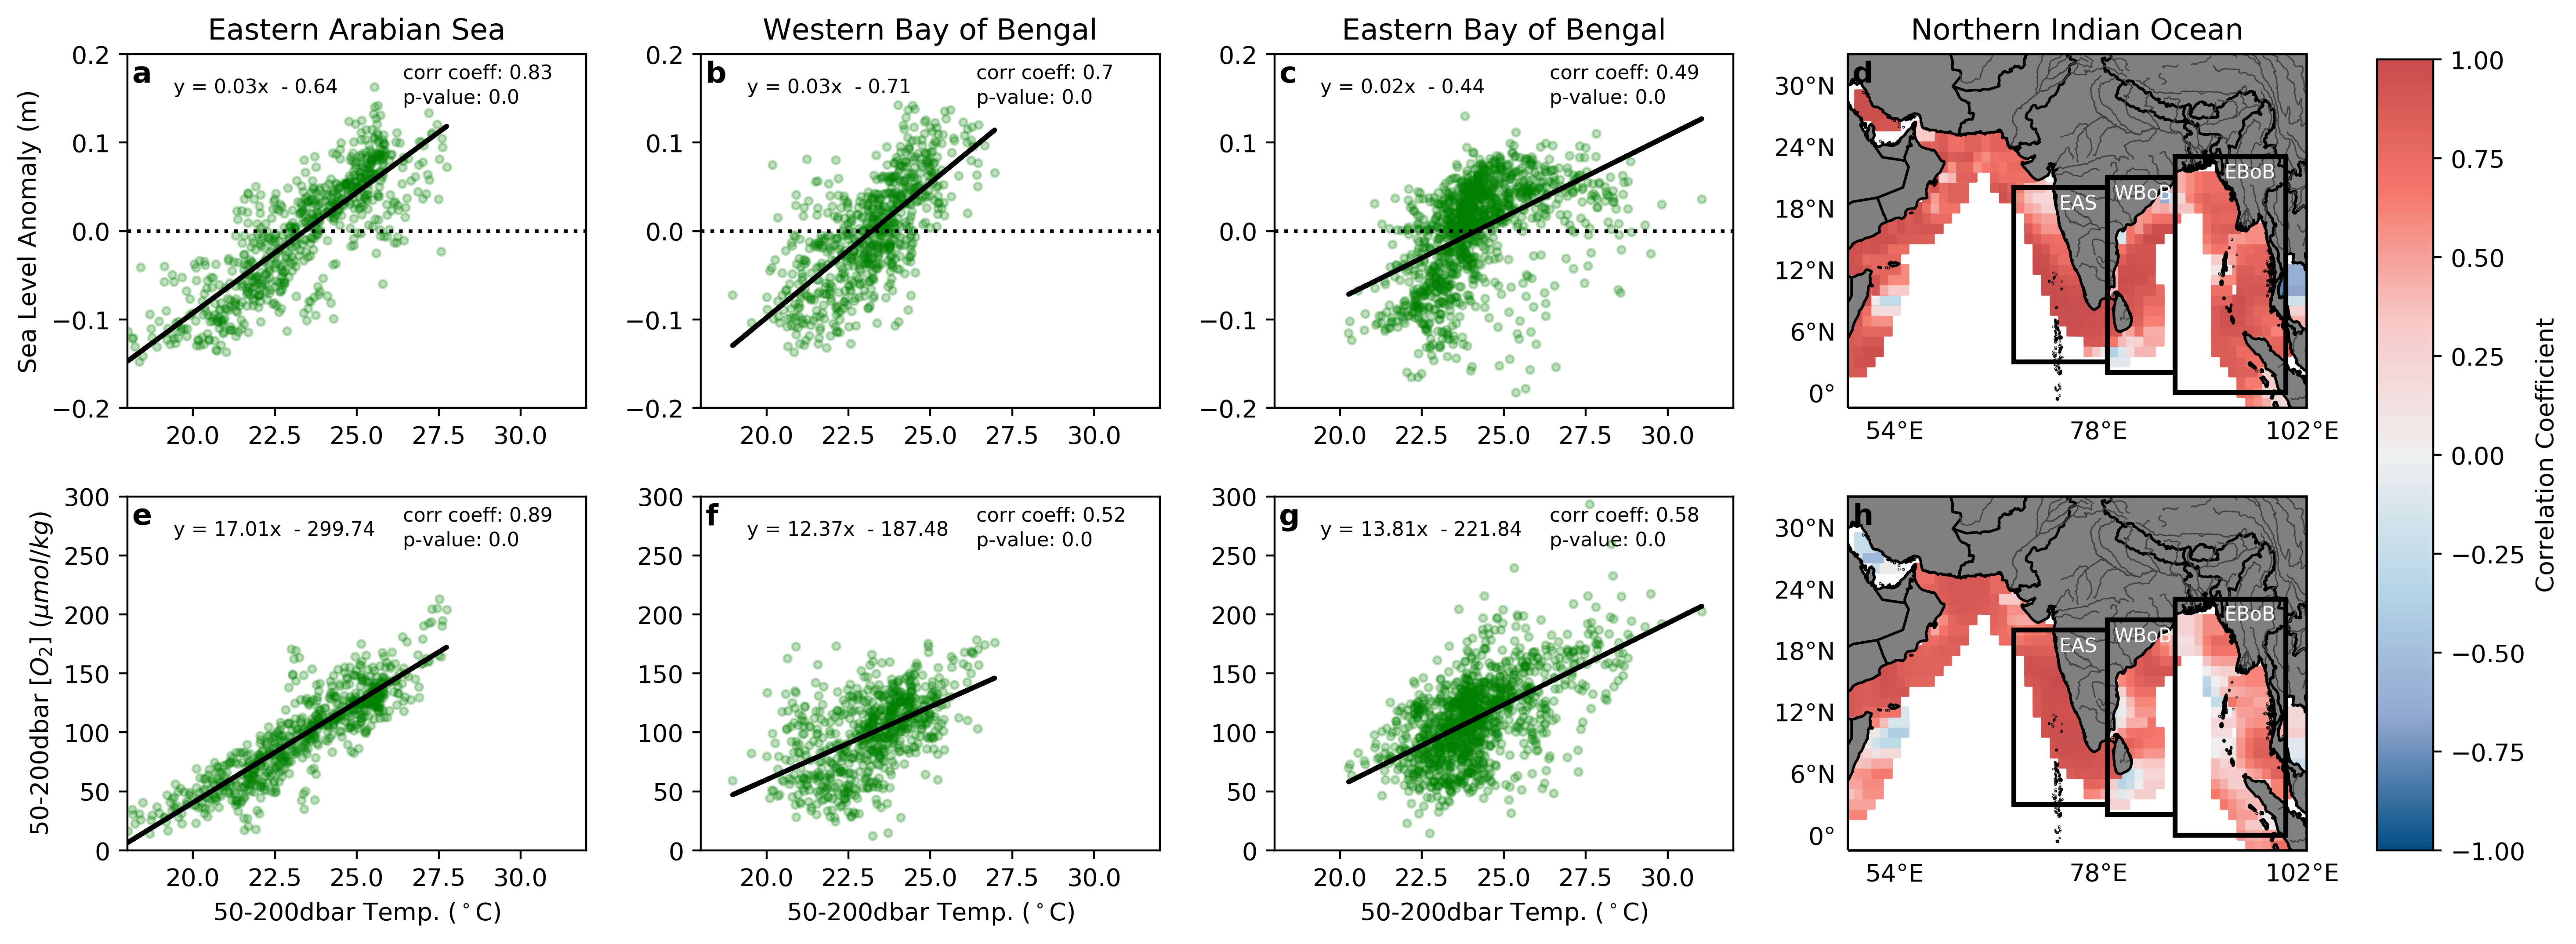

In [28]:
fig = plt.figure(figsize=(16,6),dpi=400)

sz = 10
sq_sz = 60
fsz = 8
alpha = 0.25

cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])
# cmap = plt.cm.seismic

sp_clr = 'g'

params = {'legend.fontsize': 10,
         'axes.labelsize': 10,
         'axes.titlesize': 12,
         'xtick.labelsize':10,
         'ytick.labelsize':10}

pylab.rcParams.update(params)

##############################################################

ylim = [-0.2,0.2]
xlim = [18,32]

ax = fig.add_subplot(241)
p = ax.scatter(temp_AS,sla_AS,c = sp_clr,s= sz,alpha = alpha)
ax.axhline(y=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(temp_AS,sla_AS)
ax.plot(temp_AS, m*temp_AS + b, 'k', linewidth = 2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('Eastern Arabian Sea')
# ax.set_xlabel('50-200dbar Temperature ($^\circ C$)')
ax.set_ylabel('Sea Level Anomaly (m)')
add_letter(ax, 'a', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  - ' + str(np.round(np.abs(b),2)), x = 0.1,y=0.89, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.93, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.86, fontsize = fsz)

ax = fig.add_subplot(242)
p = ax.scatter(temp_wBoB,sla_wBoB,c = sp_clr,s= sz,alpha = alpha)
ax.axhline(y=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(temp_wBoB,sla_wBoB)
ax.plot(temp_wBoB, m*temp_wBoB + b, 'k', linewidth = 2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('Western Bay of Bengal')
# ax.set_xlabel('Sea Level Anomaly (m)')
add_letter(ax, 'b', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  - ' + str(np.round(np.abs(b),2)), x = 0.1,y=0.89, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.93, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.86, fontsize = fsz)

ax = fig.add_subplot(243)
p = ax.scatter(temp_BoB,sla_BoB,c = sp_clr,s= sz,alpha = alpha)
ax.axhline(y=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(temp_BoB,sla_BoB)
ax.plot(temp_BoB, m*temp_BoB + b, 'k', linewidth = 2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('Eastern Bay of Bengal')
# ax.set_xlabel('Sea Level Anomaly (m)')
add_letter(ax, 'c', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  - ' + str(np.round(np.abs(b),2)), x = 0.1,y=0.89, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.93, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.86, fontsize = fsz)

ax = fig.add_subplot(244,projection= ccrs.PlateCarree())
var = r_value_temp_sla.flatten()
ax.scatter(ds_WOA.coastal_mask_xx,ds_WOA.coastal_mask_yy,c = var[ds_WOA.coastal_mask],
               cmap = cmap,s = sq_sz,marker = 's',vmin = -1, vmax = 1,
               transform=ccrs.PlateCarree())
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 10}
g.ylabel_style = {'size': 10}
add_letter(ax, 'd', x = 0.01,y=0.92)
ax.set_title('Northern Indian Ocean')
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
add_box(ax,box_bounds,clrs)
add_text(ax, 'EAS', x = 0.46,y=0.56, fontsize = fsz, color = 'w')
add_text(ax, 'WBoB', x = 0.58,y=0.59, fontsize = fsz, color = 'w')
add_text(ax, 'EBoB', x = 0.82,y=0.65, fontsize = fsz, color = 'w')


#-------------------------------------------------------------

ylim = [0,300]
xlim = [18,32]

ax = fig.add_subplot(245)
ax.scatter(temp_AS,doxy_AS,c = sp_clr,s= sz,alpha = alpha)
m, b, r, p_val,_ =stats.linregress(temp_AS, doxy_AS)
ax.plot(temp_AS, m*temp_AS + b, 'k', linewidth = 2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel('50-200dbar [$O_2$] ($\mu mol/ kg$)')
ax.set_xlabel('50-200dbar Temp. ($^\circ$C)')
add_letter(ax, 'e', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  - ' + str(np.round(np.abs(b),2)), x = 0.1,y=0.89, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.93, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.86, fontsize = fsz)

ax = fig.add_subplot(246)
ax.scatter(temp_wBoB,doxy_wBoB,c = sp_clr,s= sz,alpha = alpha)
m, b, r, p_val,_ =stats.linregress(temp_wBoB, doxy_wBoB)
ax.plot(temp_wBoB, m*temp_wBoB + b, 'k', linewidth = 2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
# ax.set_yticklabels([])
ax.set_xlabel('50-200dbar Temp. ($^\circ$C)')
add_letter(ax, 'f', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  - ' + str(np.round(np.abs(b),2)), x = 0.1,y=0.89, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.93, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.86, fontsize = fsz)

ax = fig.add_subplot(247)
ax.scatter(temp_BoB,doxy_BoB,c = sp_clr,s= sz,alpha = alpha)
m, b, r, p_val,_ =stats.linregress(temp_BoB, doxy_BoB)
ax.plot(temp_BoB, m*temp_BoB + b, 'k', linewidth = 2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
# ax.set_yticklabels([])
ax.set_xlabel('50-200dbar Temp. ($^\circ$C)')
add_letter(ax, 'g', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  - ' + str(np.round(np.abs(b),2)), x = 0.1,y=0.89, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.93, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.86, fontsize = fsz)

ax = fig.add_subplot(248,projection= ccrs.PlateCarree())
var = r_value_temp_doxy.flatten()
p=ax.scatter(ds_WOA.coastal_mask_xx,ds_WOA.coastal_mask_yy,c = var[ds_WOA.coastal_mask],
               cmap = cmap,s = sq_sz,marker = 's',vmin = -1, vmax = 1,
               transform=ccrs.PlateCarree())
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 10}
g.ylabel_style = {'size': 10}
add_letter(ax, 'h', x = 0.01,y=0.92)
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
add_box(ax,box_bounds,clrs)
add_text(ax, 'EAS', x = 0.46,y=0.56, fontsize = fsz, color = 'w')
add_text(ax, 'WBoB', x = 0.58,y=0.59, fontsize = fsz, color = 'w')
add_text(ax, 'EBoB', x = 0.82,y=0.65, fontsize = fsz, color = 'w')

plt.subplots_adjust(hspace = 0.25, wspace = 0.25)

add_single_vert_cbar(fig,p,'Correlation Coefficient')

# Individual Scatter

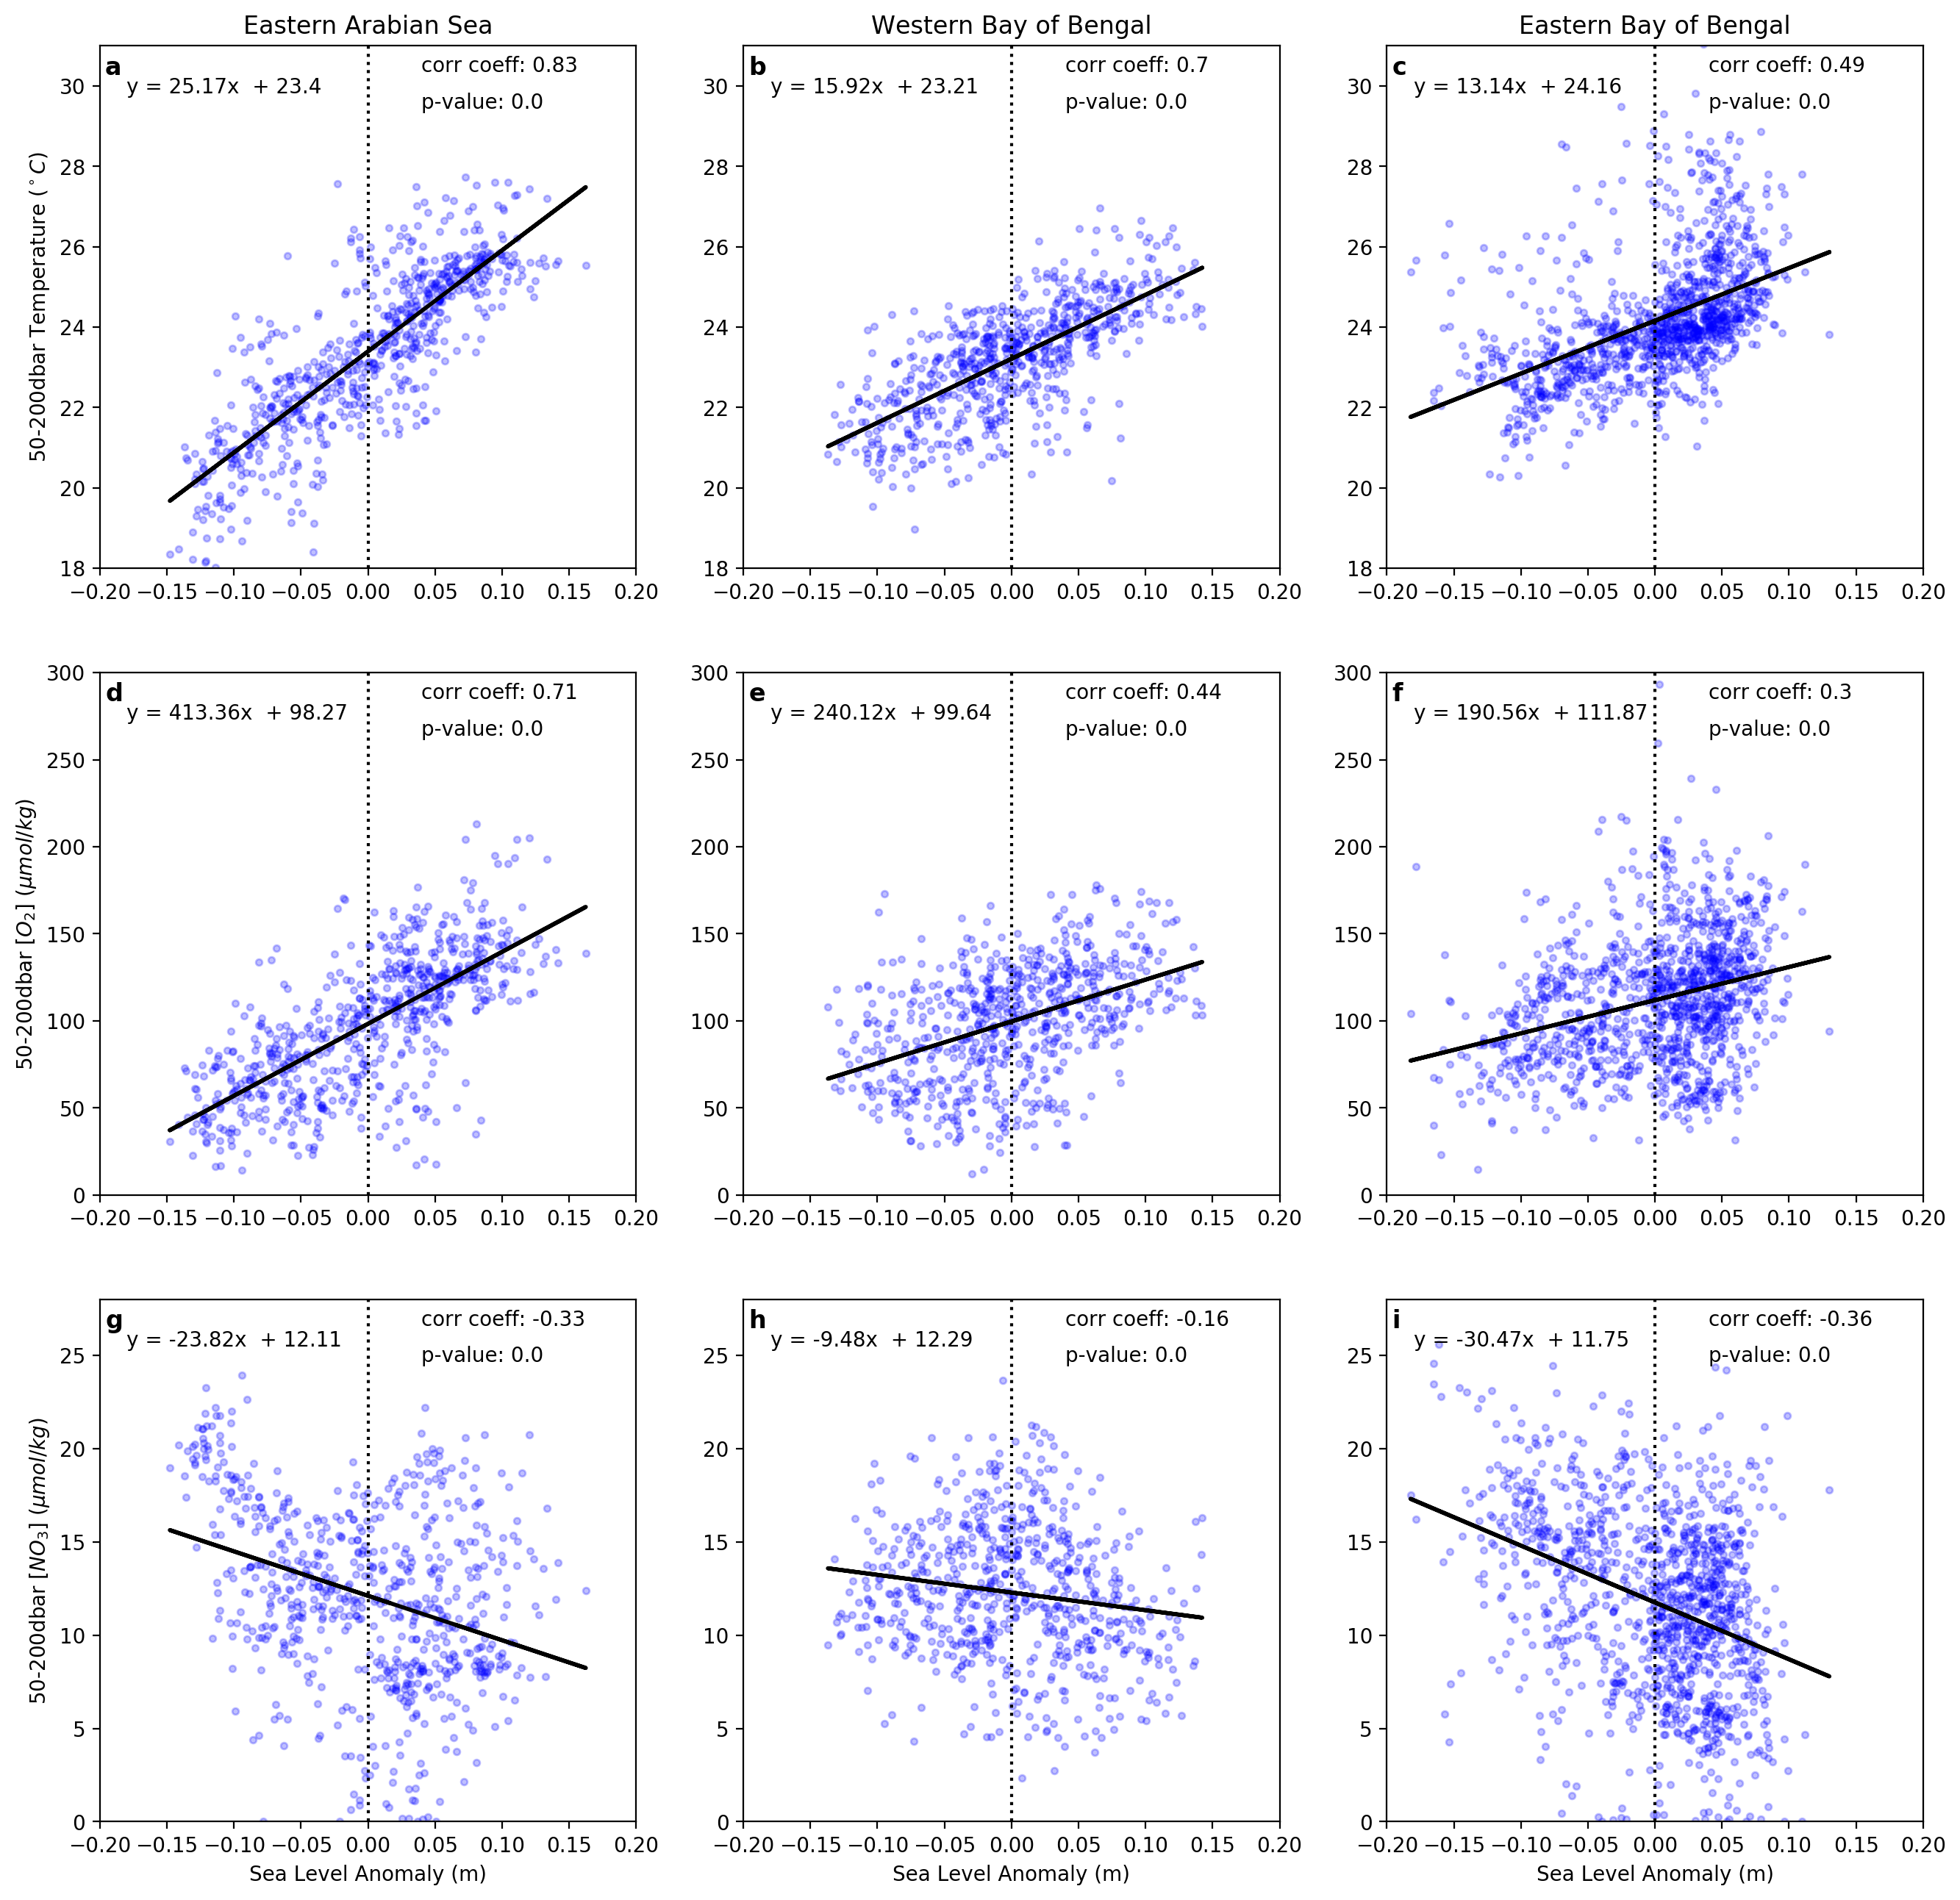

In [29]:
fig, axes = plt.subplots(nrows = 3, ncols = 3,figsize=(16,16),dpi=200)
sz = 10
fsz = 10
alpha = 0.25

cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])


plt.rcParams.update({'font.size': 14})

##############################################################

ylim = [18,31]
xlim = [-0.2,0.2]

ax = axes[0,0]
p = ax.scatter(sla_AS,temp_AS,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(sla_AS, temp_AS)
ax.plot(sla_AS, m*sla_AS + b, 'k', linewidth = 2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('Eastern Arabian Sea')
ax.set_ylabel('50-200dbar Temperature ($^\circ C$)')
add_letter(ax, 'a')
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  + ' + str(np.round(b,2)), x = 0.05,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.95, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.88, fontsize = fsz)

ax = axes[0,1]
p = ax.scatter(sla_wBoB,temp_wBoB,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB, temp_wBoB)
ax.plot(sla_wBoB, m*sla_wBoB + b, 'k', linewidth = 2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('Western Bay of Bengal')
add_letter(ax, 'b')
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  + ' + str(np.round(b,2)), x = 0.05,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.95, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.88, fontsize = fsz)

ax = axes[0,2]
p = ax.scatter(sla_BoB,temp_BoB,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_BoB, temp_BoB)
ax.plot(sla_BoB, m*sla_BoB + b, 'k', linewidth = 2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('Eastern Bay of Bengal')
add_letter(ax, 'c')
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  + ' + str(np.round(b,2)), x = 0.05,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.95, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.88, fontsize = fsz)

#-------------------------------------------------------------
ylim = [0,300]
xlim = [-0.2,0.2]

ax = axes[1,0]
ax.scatter(sla_AS,doxy_AS,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_AS, doxy_AS)
ax.plot(sla_AS, m*sla_AS + b, 'k', linewidth = 2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel('50-200dbar [$O_2$] ($\mu mol/ kg$)')
add_letter(ax, 'd')
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  + ' + str(np.round(b,2)), x = 0.05,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.95, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.88, fontsize = fsz)

ax = axes[1,1]
ax.scatter(sla_wBoB,doxy_wBoB,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB, doxy_wBoB)
ax.plot(sla_wBoB, m*sla_wBoB + b, 'k', linewidth = 2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
add_letter(ax, 'e')
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  + ' + str(np.round(b,2)), x = 0.05,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.95, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.88, fontsize = fsz)

ax = axes[1,2]
ax.scatter(sla_BoB,doxy_BoB,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_BoB, doxy_BoB)
ax.plot(sla_BoB, m*sla_BoB + b, 'k', linewidth = 2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
add_letter(ax, 'f')
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  + ' + str(np.round(b,2)), x = 0.05,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.95, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.88, fontsize = fsz)

#-------------------------------------------------------------
ylim = [0,28]
xlim = [-0.2,0.2]

ax = axes[2,0]
ax.scatter(sla_AS,nitrate_AS,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_AS, nitrate_AS)
ax.plot(sla_AS, m*sla_AS + b, 'k', linewidth = 2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel('50-200dbar [$NO_3$] ($\mu mol/ kg$)')
ax.set_xlabel('Sea Level Anomaly (m)')
add_letter(ax, 'g')
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  + ' + str(np.round(b,2)), x = 0.05,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.95, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.88, fontsize = fsz)

ax = axes[2,1]
ax.scatter(sla_wBoB,nitrate_wBoB,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB, nitrate_wBoB)
ax.plot(sla_wBoB, m*sla_wBoB + b, 'k', linewidth = 2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('Sea Level Anomaly (m)')
add_letter(ax, 'h')
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  + ' + str(np.round(b,2)), x = 0.05,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.95, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.88, fontsize = fsz)

ax = axes[2,2]
# p = ax.scatter(sla_BoB,nitrate_BoB,c = mon_BoB,s= sz,cmap=cmap)
ax.scatter(sla_BoB,nitrate_BoB,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
# ax.scatter(sla_BoB[seas_BoB == 0],nitrate_BoB[seas_BoB == 0],c = 'r',s= sz,alpha = alpha)
# ax.scatter(sla_BoB[seas_BoB == 1],nitrate_BoB[seas_BoB == 1],c = 'b',s= sz,alpha = alpha)


ax.axvline(x=0,color = 'k',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_BoB, nitrate_BoB)
ax.plot(sla_BoB, m*sla_BoB + b, 'k', linewidth = 2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('Sea Level Anomaly (m)')
add_letter(ax, 'i')
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  + ' + str(np.round(b,2)), x = 0.05,y=0.91, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.95, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.88, fontsize = fsz)


# Individual Map

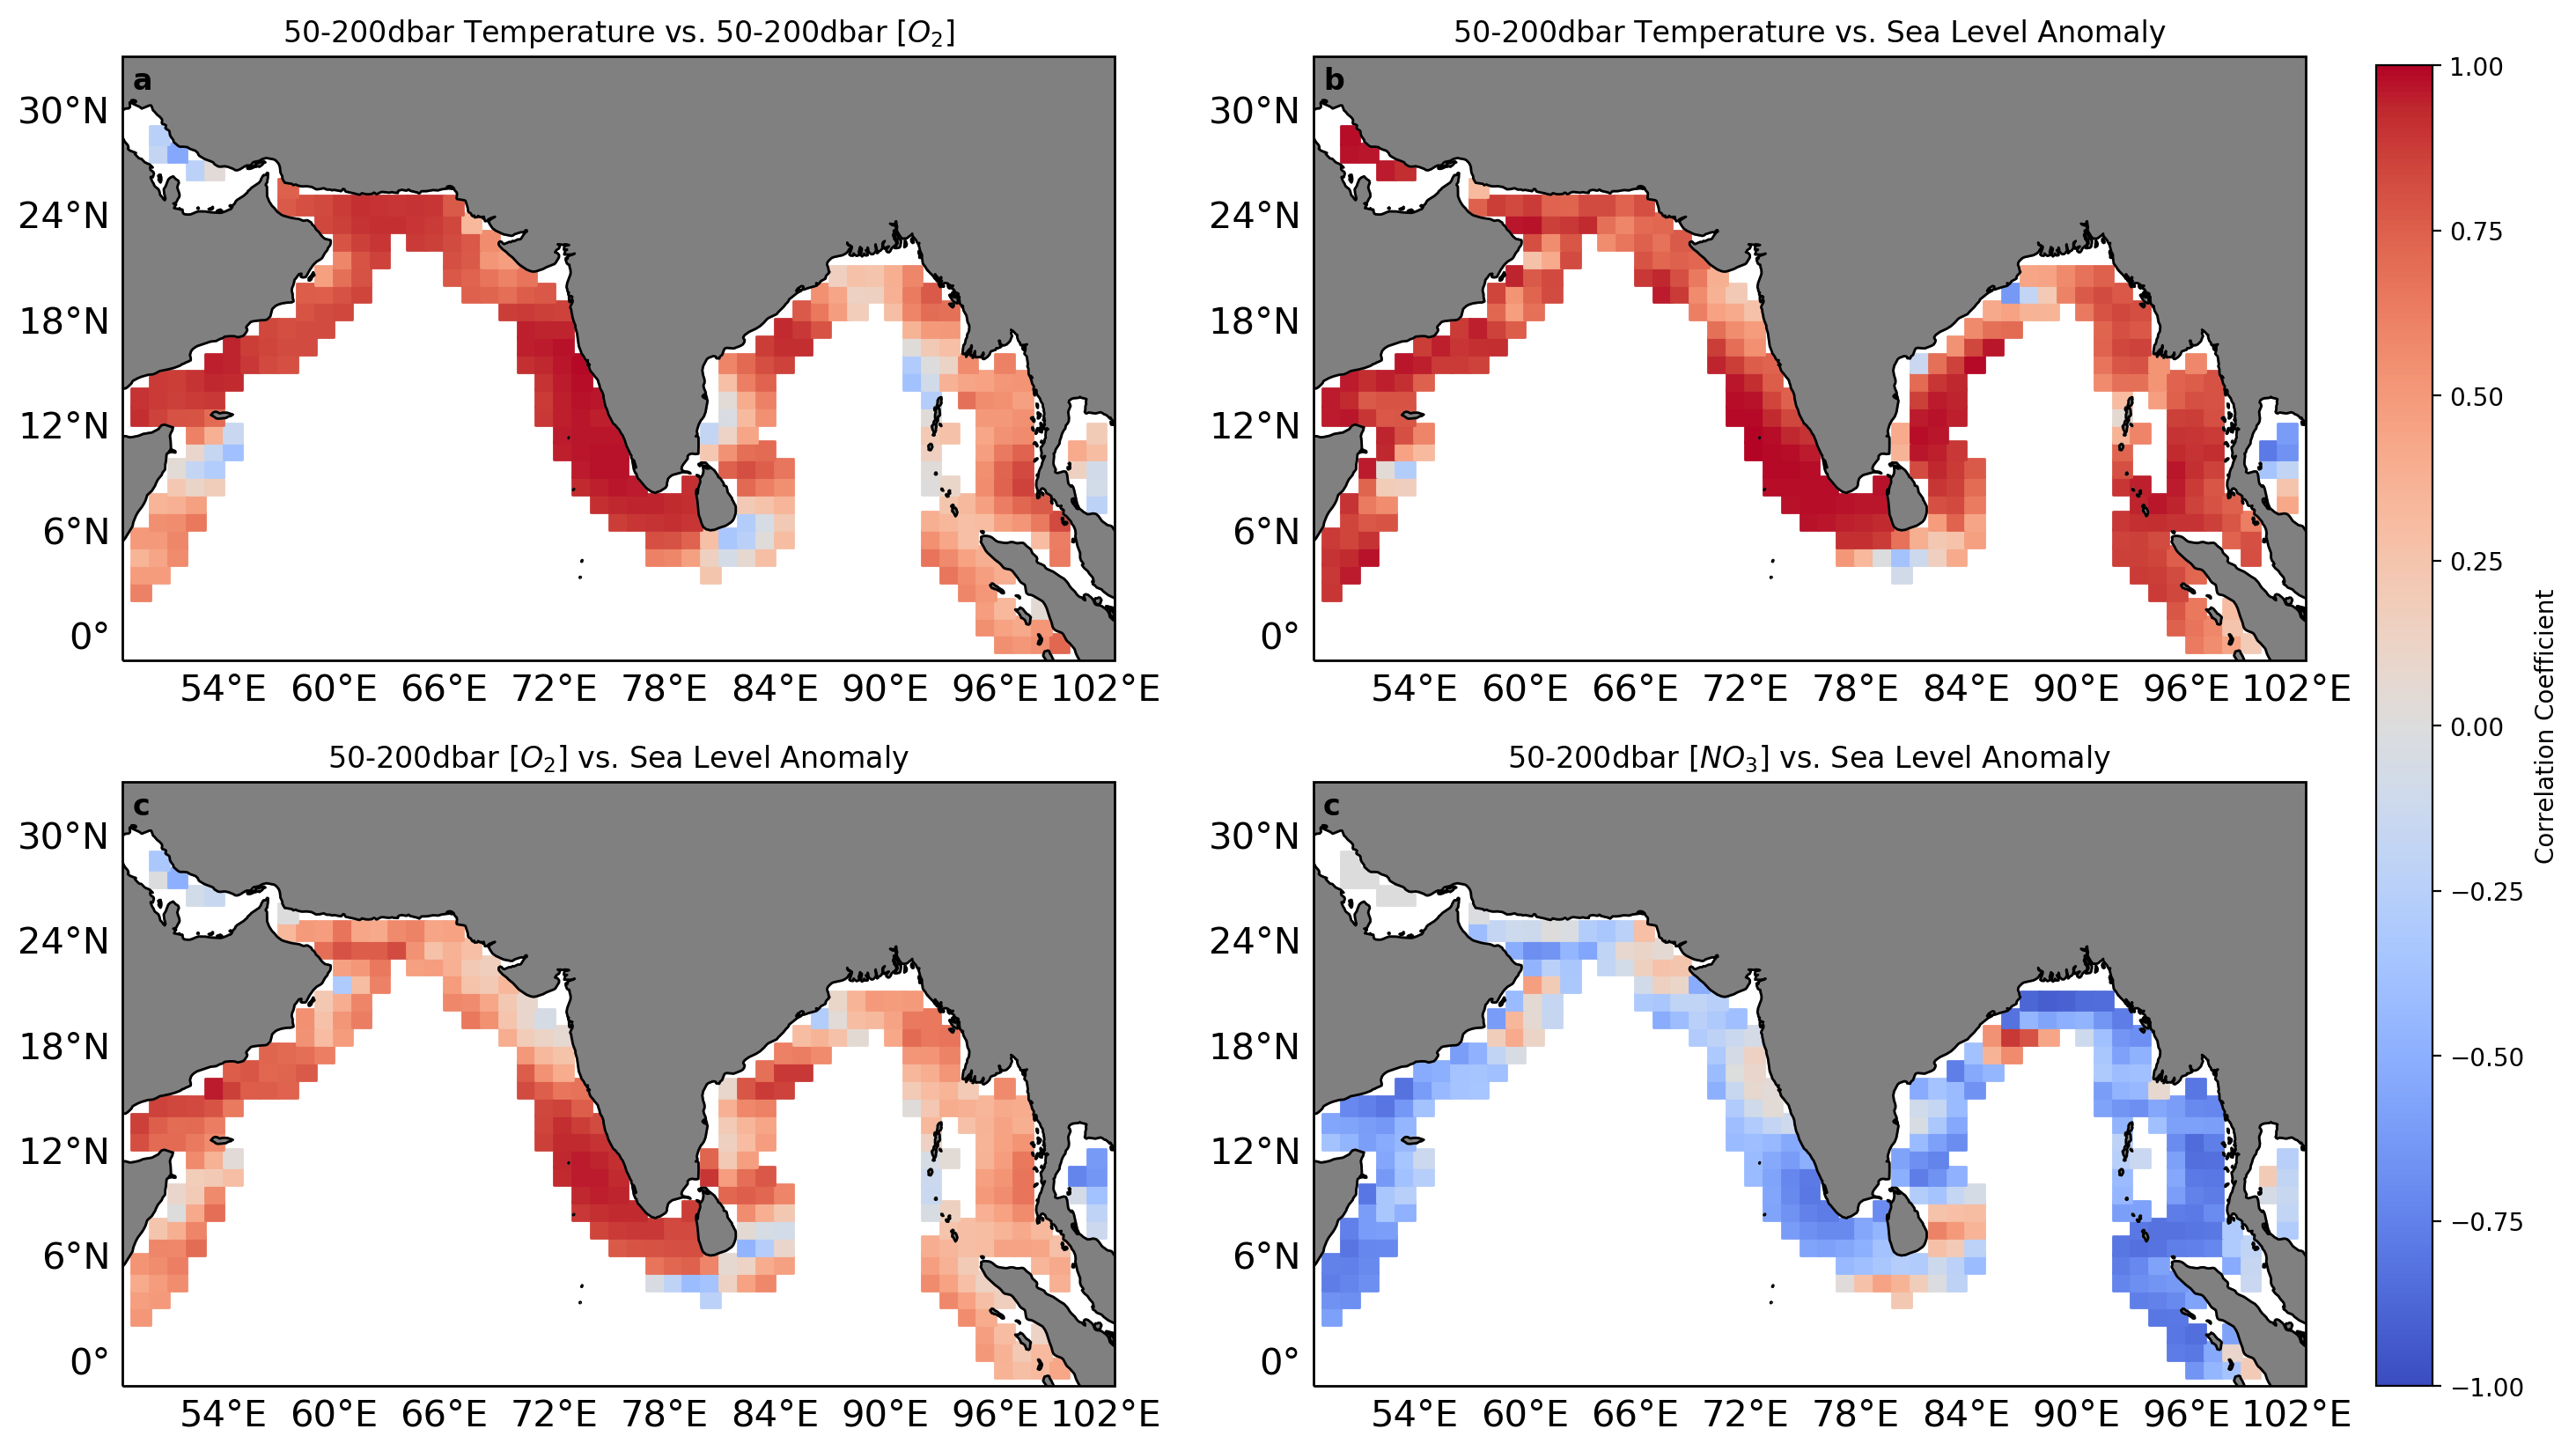

In [30]:
fig = plt.figure(figsize=(16,10),dpi=200)

xx,yy = np.meshgrid(ds_WOA.lon,ds_WOA.lat)

sz = 60

##############################################################

ax = fig.add_subplot(221,projection= ccrs.PlateCarree())
var = r_value_temp_doxy.flatten()
ax.scatter(ds_WOA.coastal_mask_xx,ds_WOA.coastal_mask_yy,c = var[ds_WOA.coastal_mask],
               cmap = plt.cm.coolwarm,s = sz,marker = 's',vmin = -1, vmax = 1,
               transform=ccrs.PlateCarree())
add_land(ax)
add_letter(ax, 'a')
ax.set_title('50-200dbar Temperature vs. 50-200dbar [$O_2$]')

ax = fig.add_subplot(222,projection= ccrs.PlateCarree())
var = r_value_temp_sla.flatten()
ax.scatter(ds_WOA.coastal_mask_xx,ds_WOA.coastal_mask_yy,c = var[ds_WOA.coastal_mask],
               cmap = plt.cm.coolwarm,s = sz,marker = 's',vmin = -1, vmax = 1,
               transform=ccrs.PlateCarree())
add_land(ax)
add_letter(ax, 'b')
ax.set_title('50-200dbar Temperature vs. Sea Level Anomaly')

ax = fig.add_subplot(223,projection= ccrs.PlateCarree())
var = r_value_doxy_sla.flatten()
ax.scatter(ds_WOA.coastal_mask_xx,ds_WOA.coastal_mask_yy,c = var[ds_WOA.coastal_mask],
               cmap = plt.cm.coolwarm,s = sz,marker = 's',vmin = -1, vmax = 1,
               transform=ccrs.PlateCarree())
add_land(ax)
add_letter(ax, 'c')
ax.set_title('50-200dbar [$O_2$] vs. Sea Level Anomaly')

ax = fig.add_subplot(224,projection= ccrs.PlateCarree())
var = r_value_nitrate_sla.flatten()
p = ax.scatter(ds_WOA.coastal_mask_xx,ds_WOA.coastal_mask_yy,c = var[ds_WOA.coastal_mask],
               cmap = plt.cm.coolwarm,s = sz,marker = 's',vmin = -1, vmax = 1,
               transform=ccrs.PlateCarree())
add_land(ax)
add_letter(ax, 'c')
ax.set_title('50-200dbar [$NO_3$] vs. Sea Level Anomaly')

add_single_vert_cbar(fig,p,'Correlation Coefficient')

In [31]:
# fig, axes = plt.subplots(nrows = 3, ncols = 3,figsize=(16,16),dpi=200)
# sz = 10
# fsz = 10
# alpha = 0.15

# cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])


# plt.rcParams.update({'font.size': 14})

# ##############################################################

# ylim = [18,31]
# xlim = [-0.2,0.2]

# ax = axes[0,0]
# ax.scatter(sla_AS,temp_AS,c = mon_AS,s= sz,cmap=cmap,alpha = alpha)
# # p = ax.scatter(sla_AS,temp_AS,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
# ax.axvline(x=0,color = 'k',linestyle = ':')
# m, b, r, p_val,_ = stats.linregress(sla_AS, temp_AS)
# ax.plot(sla_AS, m*sla_AS + b, 'k', linewidth = 2)
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
# ax.set_title('Eastern Arabian Sea')
# ax.set_ylabel('50-200dbar Temperature ($^\circ C$)')
# add_letter(ax, 'a')
# add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  + ' + str(np.round(b,2)), x = 0.05,y=0.91, fontsize = fsz)
# add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.95, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.88, fontsize = fsz)

# ax = axes[0,1]
# ax.scatter(sla_wBoB,temp_wBoB,c = mon_wBoB,s= sz,cmap=cmap,alpha = alpha)
# # p = ax.scatter(sla_wBoB,temp_wBoB,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
# ax.axvline(x=0,color = 'k',linestyle = ':')
# m, b, r, p_val,_ =stats.linregress(sla_wBoB, temp_wBoB)
# ax.plot(sla_wBoB, m*sla_wBoB + b, 'k', linewidth = 2)
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
# ax.set_title('Western Bay of Bengal')
# add_letter(ax, 'b')
# add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  + ' + str(np.round(b,2)), x = 0.05,y=0.91, fontsize = fsz)
# add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.95, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.88, fontsize = fsz)

# ax = axes[0,2]
# ax.scatter(sla_BoB,temp_BoB,c = mon_BoB,s= sz,cmap=cmap,alpha = alpha)
# # p = ax.scatter(sla_BoB,temp_BoB,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
# ax.axvline(x=0,color = 'k',linestyle = ':')
# m, b, r, p_val,_ =stats.linregress(sla_BoB, temp_BoB)
# ax.plot(sla_BoB, m*sla_BoB + b, 'k', linewidth = 2)
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
# ax.set_title('Eastern Bay of Bengal')
# add_letter(ax, 'c')
# add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  + ' + str(np.round(b,2)), x = 0.05,y=0.91, fontsize = fsz)
# add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.95, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.88, fontsize = fsz)

# #-------------------------------------------------------------
# ylim = [0,300]
# xlim = [-0.2,0.2]

# ax = axes[1,0]
# ax.scatter(sla_AS,doxy_AS,c = mon_AS,s= sz,cmap=cmap,alpha = alpha)
# # ax.scatter(sla_AS,doxy_AS,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
# ax.axvline(x=0,color = 'k',linestyle = ':')
# m, b, r, p_val,_ =stats.linregress(sla_AS, doxy_AS)
# ax.plot(sla_AS, m*sla_AS + b, 'k', linewidth = 2)
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
# ax.set_ylabel('50-200dbar [$O_2$] ($\mu mol/ kg$)')
# add_letter(ax, 'd')
# add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  + ' + str(np.round(b,2)), x = 0.05,y=0.91, fontsize = fsz)
# add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.95, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.88, fontsize = fsz)

# ax = axes[1,1]
# ax.scatter(sla_wBoB,doxy_wBoB,c = mon_wBoB,s= sz,cmap=cmap,alpha = alpha)
# # ax.scatter(sla_wBoB,doxy_wBoB,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
# ax.axvline(x=0,color = 'k',linestyle = ':')
# m, b, r, p_val,_ =stats.linregress(sla_wBoB, doxy_wBoB)
# ax.plot(sla_wBoB, m*sla_wBoB + b, 'k', linewidth = 2)
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
# add_letter(ax, 'e')
# add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  + ' + str(np.round(b,2)), x = 0.05,y=0.91, fontsize = fsz)
# add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.95, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.88, fontsize = fsz)

# ax = axes[1,2]
# ax.scatter(sla_BoB,doxy_BoB,c = mon_BoB,s= sz,cmap=cmap,alpha = alpha)
# # ax.scatter(sla_BoB,doxy_BoB,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
# ax.axvline(x=0,color = 'k',linestyle = ':')
# m, b, r, p_val,_ =stats.linregress(sla_BoB, doxy_BoB)
# ax.plot(sla_BoB, m*sla_BoB + b, 'k', linewidth = 2)
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
# add_letter(ax, 'f')
# add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  + ' + str(np.round(b,2)), x = 0.05,y=0.91, fontsize = fsz)
# add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.95, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.88, fontsize = fsz)

# #-------------------------------------------------------------
# ylim = [0,28]
# xlim = [-0.2,0.2]

# ax = axes[2,0]
# # ax.scatter(sla_AS,nitrate_AS,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
# ax.scatter(sla_AS,nitrate_AS,c = mon_AS,s= sz,cmap=cmap,alpha = alpha)
# ax.axvline(x=0,color = 'k',linestyle = ':')
# m, b, r, p_val,_ =stats.linregress(sla_AS, nitrate_AS)
# ax.plot(sla_AS, m*sla_AS + b, 'k', linewidth = 2)
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
# ax.set_ylabel('50-200dbar [$NO_3$] ($\mu mol/ kg$)')
# ax.set_xlabel('Sea Level Anomaly (m)')
# add_letter(ax, 'g')
# add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  + ' + str(np.round(b,2)), x = 0.05,y=0.91, fontsize = fsz)
# add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.95, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.88, fontsize = fsz)

# ax = axes[2,1]
# # ax.scatter(sla_wBoB,nitrate_wBoB,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
# ax.scatter(sla_wBoB,nitrate_wBoB,c = mon_wBoB,s= sz,cmap=cmap, alpha = alpha)
# ax.axvline(x=0,color = 'k',linestyle = ':')
# m, b, r, p_val,_ =stats.linregress(sla_wBoB, nitrate_wBoB)
# ax.plot(sla_wBoB, m*sla_wBoB + b, 'k', linewidth = 2)
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
# ax.set_xlabel('Sea Level Anomaly (m)')
# add_letter(ax, 'h')
# add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  + ' + str(np.round(b,2)), x = 0.05,y=0.91, fontsize = fsz)
# add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.95, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.88, fontsize = fsz)

# ax = axes[2,2]
# # p = ax.scatter(sla_BoB,nitrate_BoB,c = mon_BoB,s= sz,cmap=cmap)
# # ax.scatter(sla_BoB,nitrate_BoB,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
# ax.scatter(sla_BoB[seas_BoB == 0],nitrate_BoB[seas_BoB == 0],c = 'r',s= sz,alpha = alpha)
# ax.scatter(sla_BoB[seas_BoB == 1],nitrate_BoB[seas_BoB == 1],c = 'b',s= sz,alpha = alpha)


# ax.axvline(x=0,color = 'k',linestyle = ':')
# m, b, r, p_val,_ =stats.linregress(sla_BoB, nitrate_BoB)
# ax.plot(sla_BoB, m*sla_BoB + b, 'k', linewidth = 2)
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
# ax.set_xlabel('Sea Level Anomaly (m)')
# add_letter(ax, 'i')
# add_text(ax, 'y = ' + str(np.round(m,2)) + 'x  + ' + str(np.round(b,2)), x = 0.05,y=0.91, fontsize = fsz)
# add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.6,y=0.95, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.6,y=0.88, fontsize = fsz)



In [32]:
# fig, axes = plt.subplots(nrows = 2, ncols = 2,figsize=(16,10),dpi=200)
# sz = 30
# alpha = 0.3

# cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])


# plt.rcParams.update({'font.size': 14})

# ##############################################################

# ax = axes[0,0]
# # p = ax.scatter(sla_AS,temp_AS,c = mon_AS,s= sz,cmap=cmap)
# p = ax.scatter(sla_AS,temp_AS,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
# ax.axvline(x=0,color = 'k',linestyle = ':')
# m, b, r, p_val,_ = stats.linregress(sla_AS, temp_AS)
# ax.plot(sla_AS, m*sla_AS + b, 'k', linewidth = 2)
# ax.set_xlim([-0.2,0.2])
# ax.set_title('Arabian Sea')
# ax.set_ylabel('50-200dbar Temperature ($^\circ C$)')
# add_letter(ax, 'a')
# add_text(ax, 'slope: ' + str(np.round(m,2)), x = 0.7,y=0.17)
# add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.7,y=0.1)
# add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.7,y=0.03)

# ax = axes[0,1]
# # p = ax.scatter(sla_BoB,temp_BoB,c = mon_BoB,s= sz,cmap=cmap)
# p = ax.scatter(sla_BoB,temp_BoB,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
# ax.axvline(x=0,color = 'k',linestyle = ':')
# m, b, r, p_val,_ =stats.linregress(sla_BoB, temp_BoB)
# ax.plot(sla_BoB, m*sla_BoB + b, 'k', linewidth = 2)
# ax.set_xlim([-0.2,0.2])
# # ax.set_ylim([0,140])
# ax.set_title('Bay of Bengal')
# add_letter(ax, 'b')
# add_text(ax, 'slope: ' + str(np.round(m,2)), x = 0.7,y=0.17)
# add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.7,y=0.1)
# add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.7,y=0.03)

# ax = axes[1,0]
# # p = ax.scatter(sla_AS,doxy_AS,c = mon_AS,s= sz,cmap=cmap)
# p = ax.scatter(sla_AS,doxy_AS,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
# ax.axvline(x=0,color = 'k',linestyle = ':')
# m, b, r, p_val,_ =stats.linregress(sla_AS, doxy_AS)
# ax.plot(sla_AS, m*sla_AS + b, 'k', linewidth = 2)
# ax.set_xlim([-0.2,0.2])
# # ax.set_ylim([0,140])
# ax.set_ylabel('50-200dbar [$O_2$] ($\mu mol/ kg$)')
# ax.set_xlabel('Sea Level Anomaly (m)')
# add_letter(ax, 'c')
# add_text(ax, 'slope: ' + str(np.round(m,2)), x = 0.7,y=0.17)
# add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.7,y=0.1)
# add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.7,y=0.03)

# ax = axes[1,1]
# # p = ax.scatter(sla_BoB,doxy_BoB,c = mon_BoB,s= sz,cmap=cmap)
# ax.scatter(sla_BoB,doxy_BoB,c = 'b',edgecolors = 'b',s= sz,alpha = alpha)
# ax.axvline(x=0,color = 'k',linestyle = ':')
# m, b, r, p_val,_ =stats.linregress(sla_BoB, doxy_BoB)
# ax.plot(sla_BoB, m*sla_BoB + b, 'k', linewidth = 2)
# ax.set_xlim([-0.2,0.2])
# # ax.set_ylim([0,140])
# ax.set_xlabel('Sea Level Anomaly (m)')
# add_letter(ax, 'd')
# add_text(ax, 'slope: ' + str(np.round(m,2)), x = 0.7,y=0.17)
# add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.7,y=0.1)
# add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.7,y=0.03)

# # mon_title = ['dec','jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov']

# # cbar_ax = fig.add_axes([0.14, 0, 0.74, 0.03])
# # cbar = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', 
# #                          ticks = np.arange(1,13))
# # cbar.set_ticklabels(mon_title)
# # cbar.set_label('month')



In [33]:
# fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(14,4),dpi=200)
# sz = 60

# cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])


# plt.rcParams.update({'font.size': 14})

# ##############################################################

# ax = axes[0]
# p = ax.scatter(tcp_AS,ocp_AS,c = 'k',s= sz,cmap=cmap, alpha = 0.1)
# ax.set_xlim([0,140])
# ax.set_ylim([0,140])
# ax.set_title('Arabian Sea')
# ax.set_ylabel('Oxycline Pressure ($\mu mol /kg$)')
# ax.set_xlabel('Thermocline Pressure (dbar)')
# add_letter(ax, 'a')

# ax = axes[1]
# p = ax.scatter(tcp_BoB,ocp_BoB,c = mon_BoB,s= sz,cmap=cmap)
# ax.set_xlim([0,140])
# ax.set_ylim([0,140])
# ax.set_title('Bay of Bengal')
# ax.set_xlabel('Thermocline Pressure (dbar)')
# add_letter(ax, 'b')


# mon_title = ['dec','jan','feb','mar','apr','may','jun','july','aug','sep','oct','nov']

# cbar_ax = fig.add_axes([0.14, -0.05, 0.74, 0.03])
# cbar = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', 
#                          ticks = np.arange(1,13))
# cbar.set_ticklabels(mon_title)
# cbar.set_label('month')



In [34]:
temp_BoB[~np.isnan(temp_BoB)].shape,doxy_BoB[~np.isnan(doxy_BoB)].shape,sla_BoB[~np.isnan(sla_BoB)].shape

((1188,), (1188,), (1188,))

In [35]:
temp_BoB[~np.isnan(temp_BoB)].shape,doxy_BoB[~np.isnan(doxy_BoB)].shape,sla_BoB[~np.isnan(sla_BoB)].shape

((1188,), (1188,), (1188,))